# Assignment 6: Clustering
This assignmnet will give you a chance to play with some of the unsupervized learning algorithms in scikit-learn, as well as implement a simple clustering algorithm yourself.

CSC 8515 - Machine Learning  
Assignment 6
Scaffolding by Dr. Ben Mitchell  
Assignment completed by: James Fung

Resources used:
On numpy random sampling: https://docs.scipy.org/doc/numpy/reference/routines.random.html

On methods to initialize clusters: https://www.quora.com/What-is-a-good-way-to-choose-initial-points-of-k-clusters-in-k-means-clustering**

In [1]:
import numpy as np

# import sklearn stuff
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

# set up for plotting as interactive figures in the notebook
%matplotlib notebook
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

## Load some data
Once again, we'll start with the iris dataset, and then apply PCA to project it down to 2 dimensions

In [2]:
# load the iris dataset
iris = datasets.load_iris()

In [3]:
# set up a PCA learner
pca = PCA(n_components = 2)
# actually run the fit algorithm
eigenbasis = pca.fit(iris.data)
# transform our data using the learned transform
iris2d = eigenbasis.transform(iris.data)

# Clustering
Another form of unsupervised learning is clustering.  Let's try running the k-means clustering algorithm on our data, and then plotting the results to see how it looks.  Note that since we're doing unsupervised learning, the algorithm doesn't get the labels (and so there's no point in having a train/test split).

In [4]:
# set the number of clusters to 3
clusters = KMeans(n_clusters=3)
# run the algorithm 
clusters.fit(iris.data)
# let's look at the cluster assignments:
sklabels = clusters.labels_
sklabels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

<IPython.core.display.Javascript object>


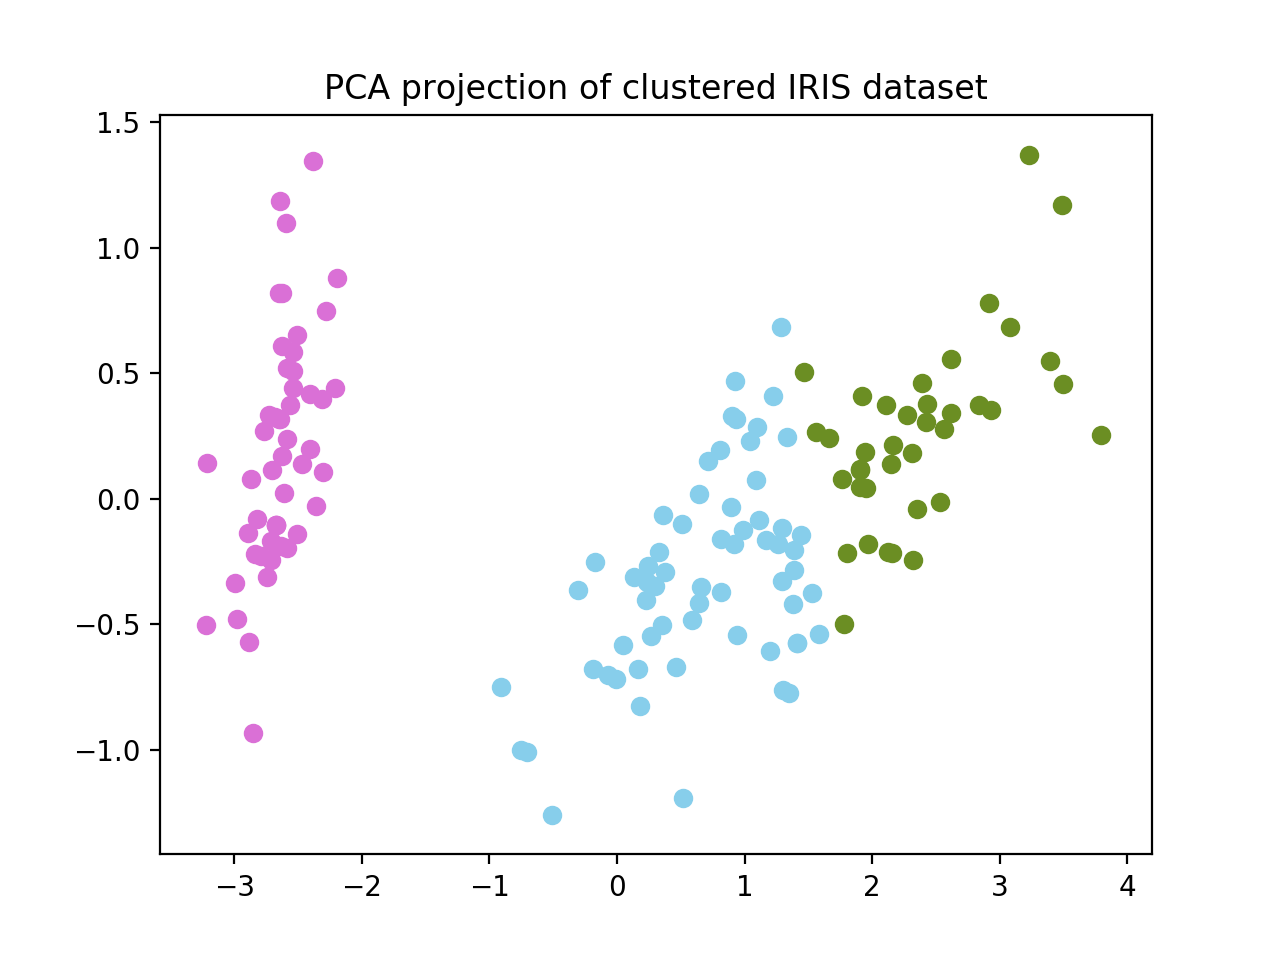

<IPython.core.display.Javascript object>


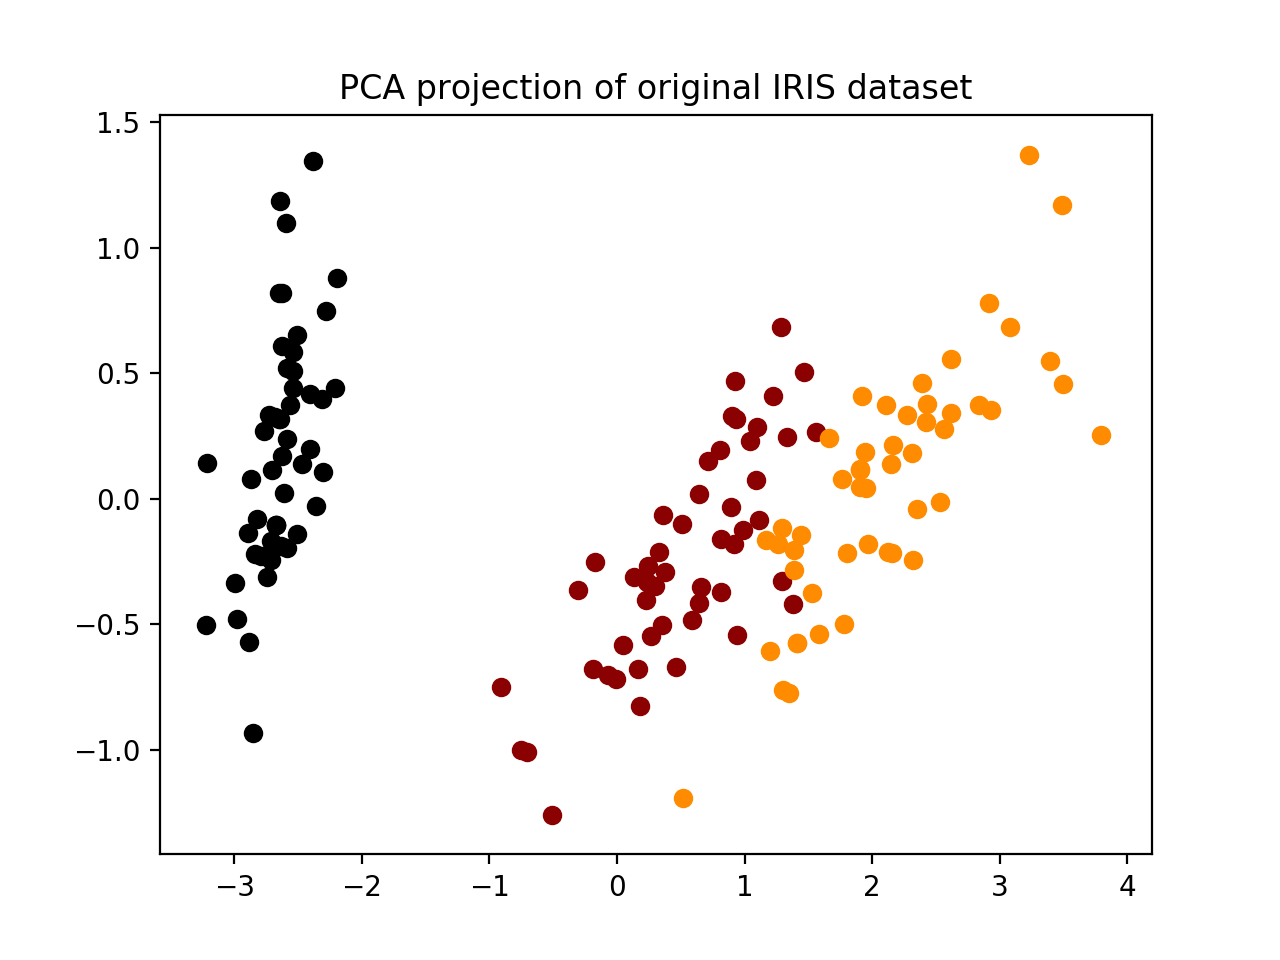

In [5]:
# now let's plot our data using cluster assignment rather than "true" class label.
# we'll use the PCA projection for visualization purposes, even though we did our
# clustering in the original 4-dimensional data space
plt.figure()
colors = ['skyblue', 'orchid', 'olivedrab']

for i in range(len(iris2d)):
    plt.scatter(iris2d[i][0], iris2d[i][1], color=colors[clusters.labels_[i]])
plt.title('PCA projection of clustered IRIS dataset')

    
# sice we do have real class labels, we might also want to plot those,
# so we can see how well the clustering matches up with the real labels
plt.figure()
colors2 = ['black', 'darkred', 'darkorange']

for i in range(len(iris2d)):
    plt.scatter(iris2d[i][0], iris2d[i][1], color=colors2[iris.target[i]])

plt.title('PCA projection of original IRIS dataset')

## Or we can combine them into a single plot
If we want one plot, we can't really use color for both, since then it will be hard to tell the difference.   However, if we use color for one plot and then shape for the other, we can see what's going on.  Here, we'll use color for original class label, and then overlay shapes based on cluster label.

<IPython.core.display.Javascript object>


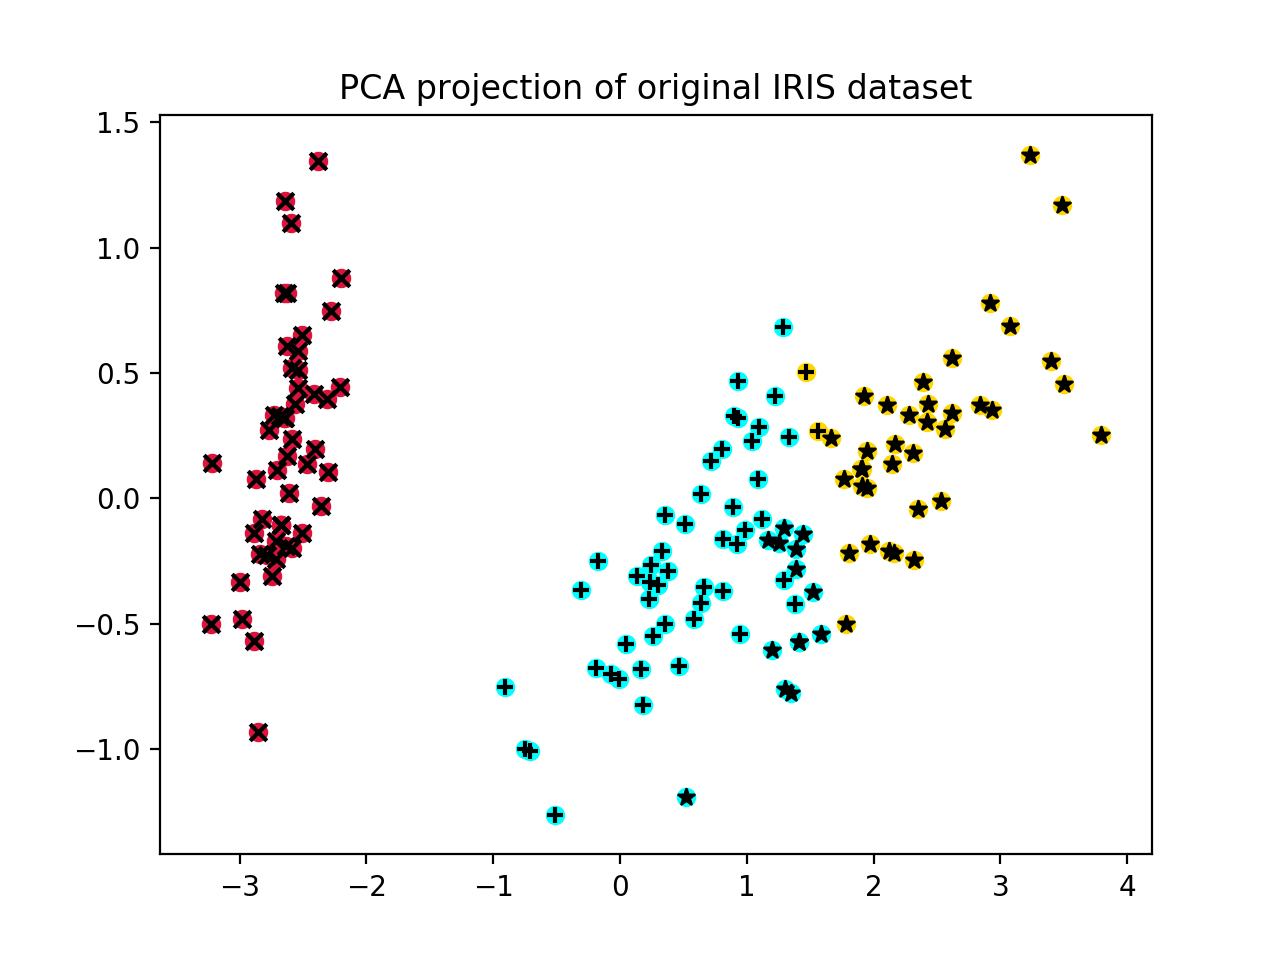

In [6]:
plt.figure()

colors = ['cyan', 'crimson', 'gold']
for i in range(len(iris2d)):
    plt.scatter(iris2d[i][0], iris2d[i][1], color=colors[clusters.labels_[i]])

markers = ['x', '+', '*']
#markers = [9, 10, 11]
for i in range(len(iris2d)):
    plt.scatter(iris2d[i][0], iris2d[i][1], marker=markers[iris.target[i]], color='black')

plt.title('PCA projection of original IRIS dataset')

# What do you notice?
Explain what you can conclude from examining these plots.

***

The clustering algorithm is very good at classifying points that are in it's own distinct area. However, if there are points very close to one another (such as points that lie on the x-axis range 1-2), then the algorithm will sometimes incorrectly classify the flower.

# Gaussian Mixture Model
We can use a Gaussian mixture either as a way of modeling a "distribution," or as a type of clustering algorithm (we're doing the same operation, we're just interpreting the results slightly differently).



In [7]:
gmm = GaussianMixture(n_components = 3, covariance_type = 'full')
gmm.fit(iris.data)
# the "means" are like cluster centers
print('means:\n', gmm.means_, '\n')
# the "covariances" define the "shape" of the clusters
print('covariances:\n', gmm.covariances_)

means:
 [[ 6.54639415  2.94946365  5.48364578  1.98726565]
 [ 5.006       3.418       1.464       0.244     ]
 [ 5.9170732   2.77804839  4.20540364  1.29848217]] 

covariances:
 [[[ 0.38744093  0.09223276  0.30244302  0.06087397]
  [ 0.09223276  0.11040914  0.08385112  0.05574334]
  [ 0.30244302  0.08385112  0.32589574  0.07276776]
  [ 0.06087397  0.05574334  0.07276776  0.08484505]]

 [[ 0.121765    0.098292    0.015816    0.010336  ]
  [ 0.098292    0.142277    0.011448    0.011208  ]
  [ 0.015816    0.011448    0.029505    0.005584  ]
  [ 0.010336    0.011208    0.005584    0.011265  ]]

 [[ 0.2755171   0.09662295  0.18547072  0.05478901]
  [ 0.09662295  0.09255152  0.09103431  0.04299899]
  [ 0.18547072  0.09103431  0.20235849  0.06171383]
  [ 0.05478901  0.04299899  0.06171383  0.03233775]]]


### Visualizing mixture models
Since we don't have "hard" cluster assignments, we can't use the same kind of plot as before.  Instead, let's try to plot the ellipsoids for each mixture component; this example is adapted from http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_covariances.html

It's not required for the assignment, but it's a good exercise to figure out how to adapt this code to display other pairs of axes (or, if you really want a challenge, try to plot the projection of the Gaussians into the basis we got from PCA)

<IPython.core.display.Javascript object>


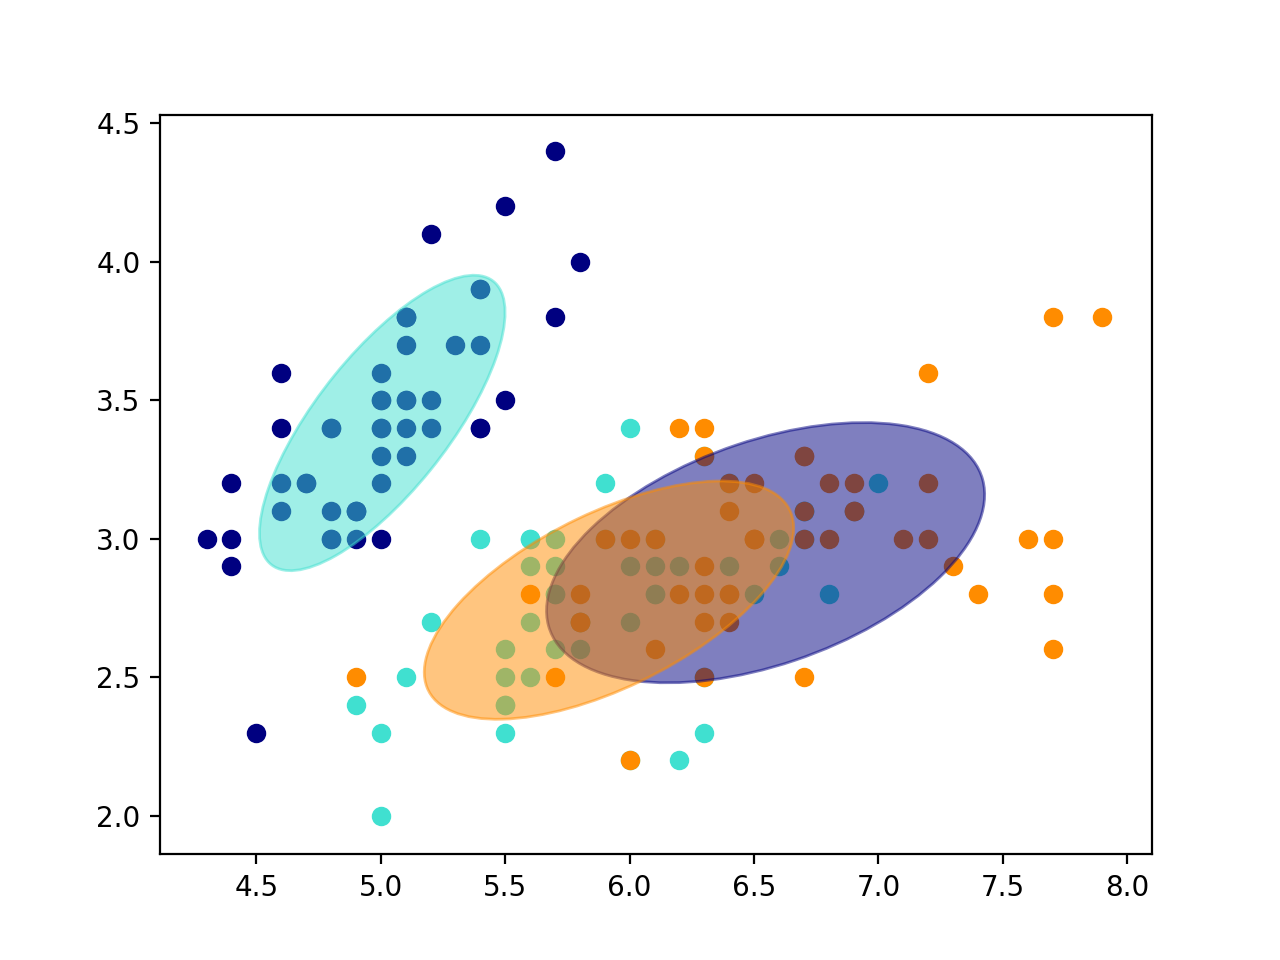

In [8]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
colors = ['navy', 'turquoise', 'darkorange']
# yet another fancy python way to scatterplot the data; here we're back to using the first 2 dimensions
for n, color in enumerate(colors):
        data = iris.data[iris.target == n]
        plt.scatter(data[:,0], data[:,1], color=color,
                    label=iris.target_names[n])

# now we'll plot some ellipses based on the first two dimensions of the Gaussians        
for n, color in enumerate(colors):
    covariances = gmm.covariances_[n][:2, :2]
    v, w = np.linalg.eigh(covariances)
    u = w[0] / np.linalg.norm(w[0])
    angle = np.arctan2(u[1], u[0])
    angle = 180 * angle / np.pi  # convert to degrees
    v = 2. * np.sqrt(2.) * np.sqrt(v)
    ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                              180 + angle, color=color)
    ell.set_clip_box(ax.bbox)
    ell.set_alpha(0.5)
    ax.add_artist(ell)

# Synthetic data
One useful way of examining the behavior of different algorithms is to use "synthetic data," or data we've created algorithmically.  In this case, we can create a set of random "clusters" and then modify them to let us see how K-means and Gaussian Mixtures behave.  This example is based on the one at (http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html#sphx-glr-auto-examples-cluster-plot-kmeans-assumptions-py), though it has been very heavily modified.

First, we'll generate some data:

In [9]:
# generate a set of round blobs; we ask for 5 clusters, a total of 200 data points, 
# each with 2 features (so we can plot them easily)
(X, y) = datasets.make_blobs(centers=5,  n_samples=200, n_features=2, random_state=3)

### Plots and clustering
Here, we first plot the "raw" data, then try running K-means with different values of K to see what the result looks like:

<IPython.core.display.Javascript object>


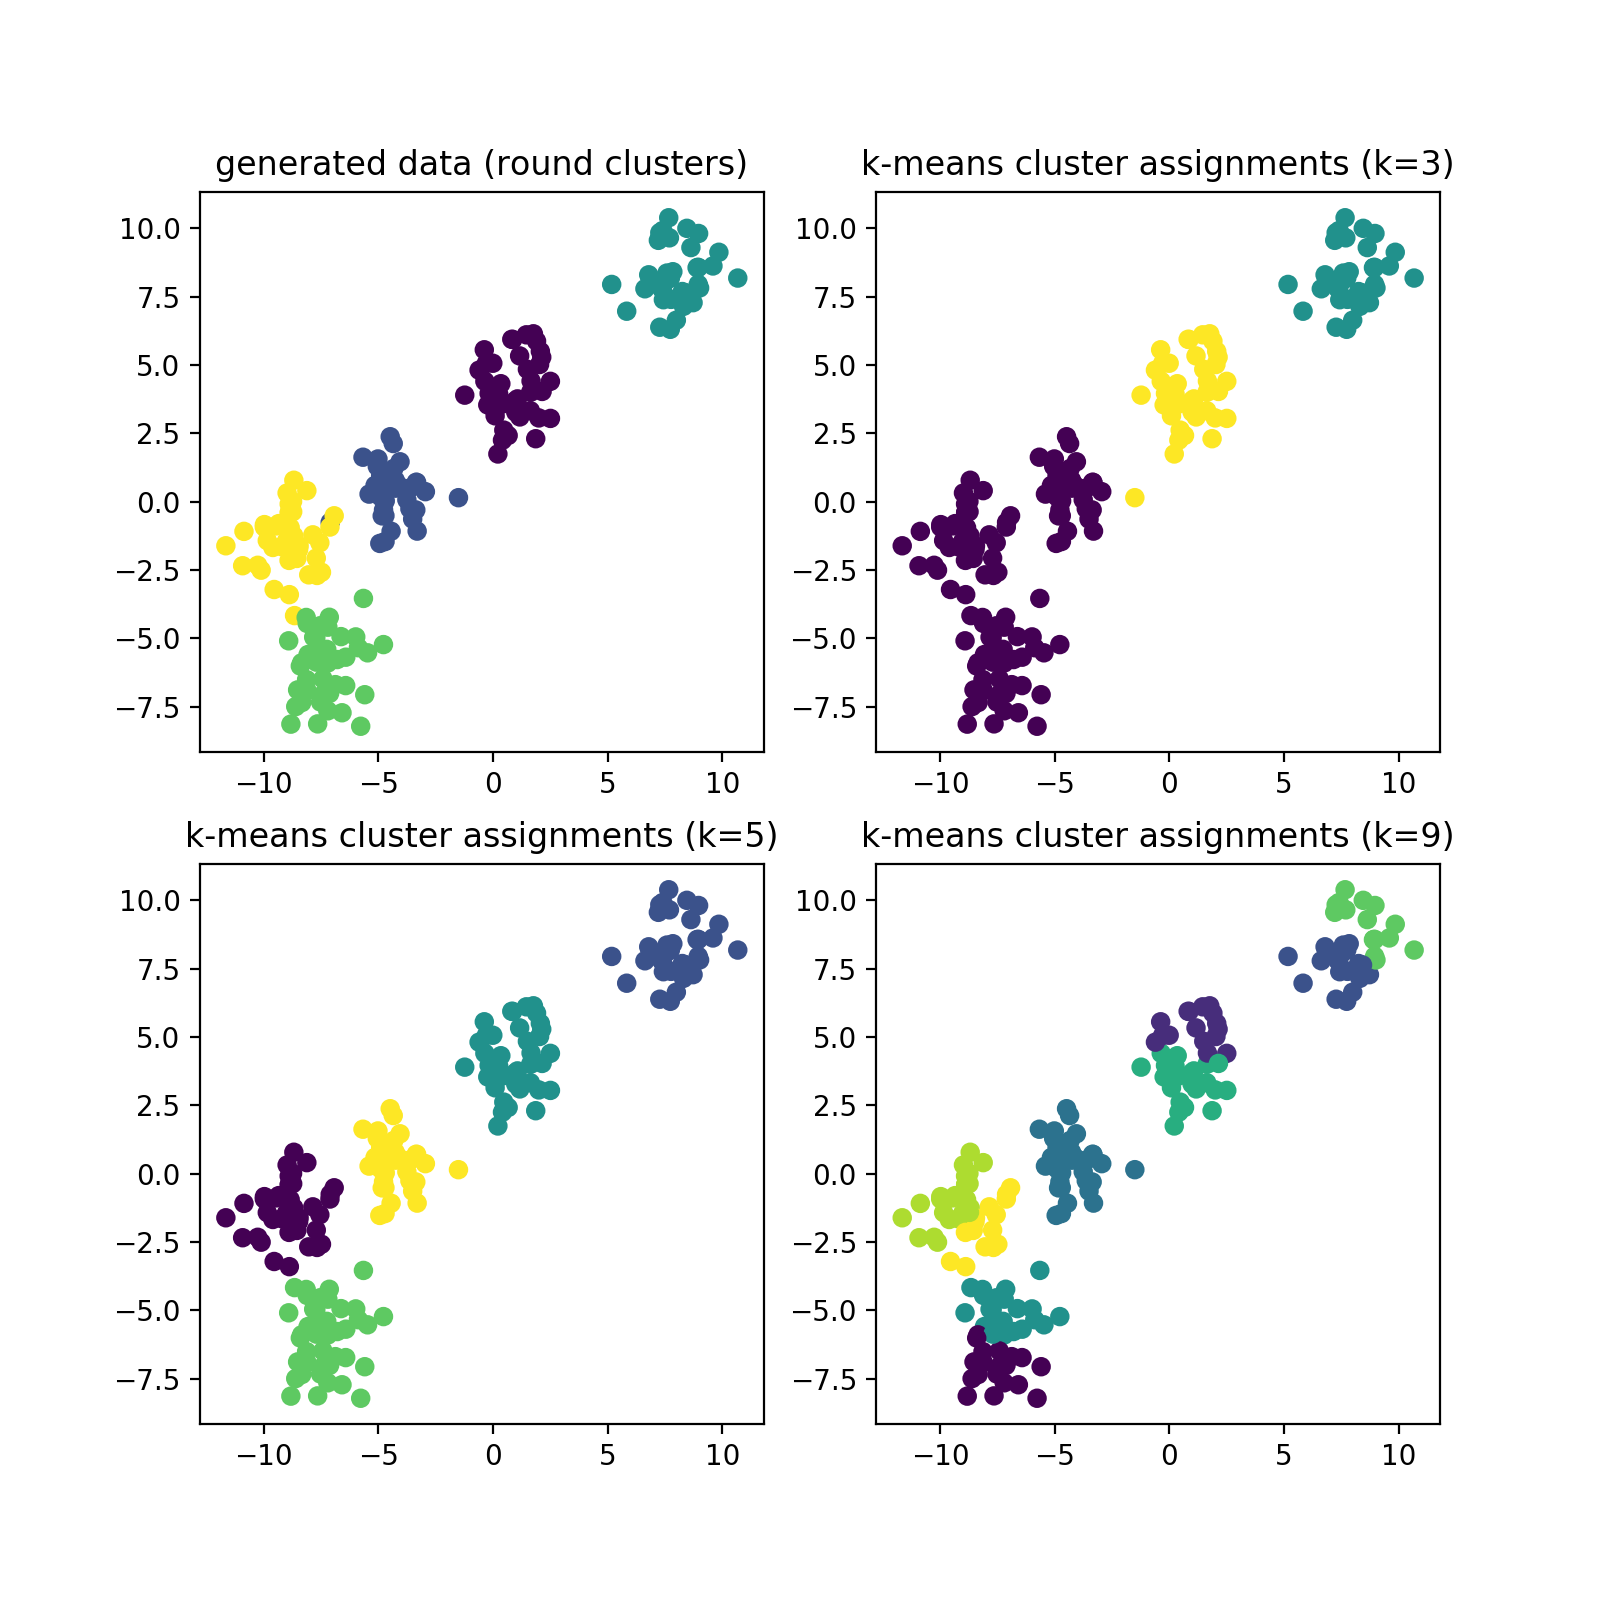

In [10]:
# create a large blank figure (sized 8x8 to have room for several sub-figures)
plt.figure(figsize=(8,8))

# add a "sub-figure"; the 221 means the full figure will be a 2x2 grid of
# sub-plots, and this is the 1st sub-plot
plt.subplot(221)
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("generated data (round clusters)")

# run k-means with k=3
y_pred = KMeans(n_clusters=3).fit_predict(X)

# add another subplot; still a 2x2 grid, but this is the 2nd plot
plt.subplot(222)
plt.scatter(X[:,0], X[:,1], c=y_pred)
plt.title("k-means cluster assignments (k=3)")

# re-run K-means with k=5 and then plot as the 3rd subfigure
y_pred = KMeans(n_clusters=5).fit_predict(X)
plt.subplot(223)
plt.scatter(X[:,0], X[:,1], c=y_pred)
plt.title("k-means cluster assignments (k=5)")

# re-run K-means with k=9 and then plot as the 4rd subfigure
y_pred = KMeans(n_clusters=9).fit_predict(X)
plt.subplot(224)
plt.scatter(X[:,0], X[:,1], c=y_pred)
plt.title("k-means cluster assignments (k=9)")

## Non-round clusters
Here, we apply a skew-like transform to stretch our clusters out along one axis; the result is non-round clusters (or "non-isotropic" to use the technical term).  We'll then plot the raw data and a k-means clustering with k=5.

<IPython.core.display.Javascript object>


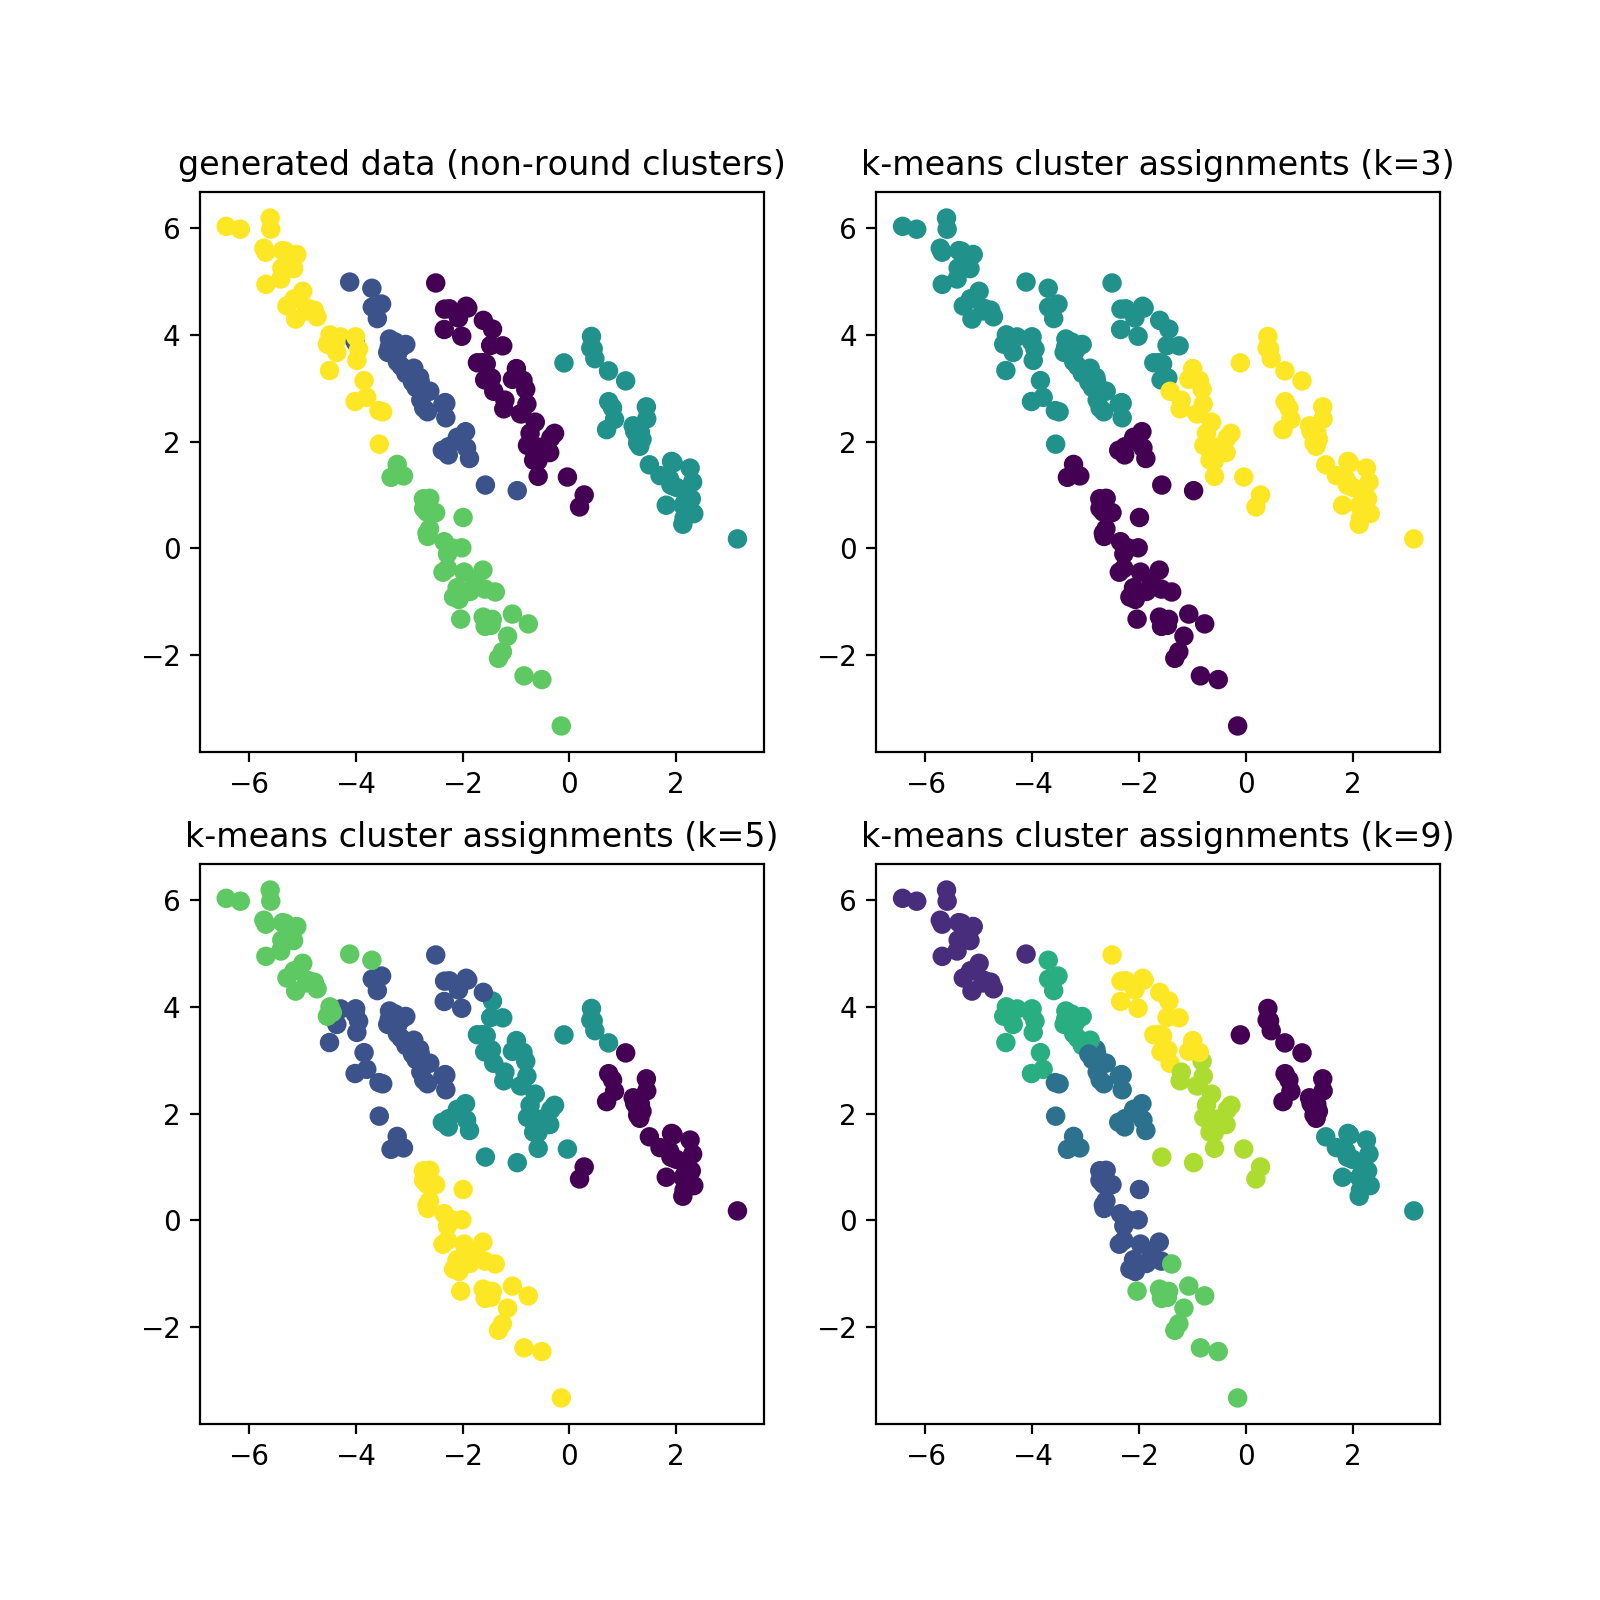

In [11]:
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
Z = np.dot(X, transformation)

# As before, make one large figure with 4 sub-figures
plt.figure(figsize=(8,8))
plt.subplot(221)
plt.scatter(Z[:,0], Z[:,1], c=y)
plt.title("generated data (non-round clusters)")

y_pred = KMeans(n_clusters=3).fit_predict(Z)
plt.subplot(222)
plt.scatter(Z[:,0], Z[:,1], c=y_pred)
plt.title("k-means cluster assignments (k=3)")

y_pred = KMeans(n_clusters=5).fit_predict(Z)
plt.subplot(223)
plt.scatter(Z[:,0], Z[:,1], c=y_pred)
plt.title("k-means cluster assignments (k=5)")

y_pred = KMeans(n_clusters=9).fit_predict(Z)
plt.subplot(224)
plt.scatter(Z[:,0], Z[:,1], c=y_pred)
plt.title("k-means cluster assignments (k=9)")

## K-means vs Gaussian Mixture
Now, your job is to create a similar set of plots, but using a Gaussian Mixture Model instead of k-means to do the clustering.  You should have a total of 2 figures and a total of 6 sub-figures (really, it's exactly what we did above, but using GMM instead of K-means).  Note that you are *not* required to plot confidence bounds as ellipses (like we did for GMM with the iris data), just plot the cluster assignments (like we did in the previous cell).

<IPython.core.display.Javascript object>


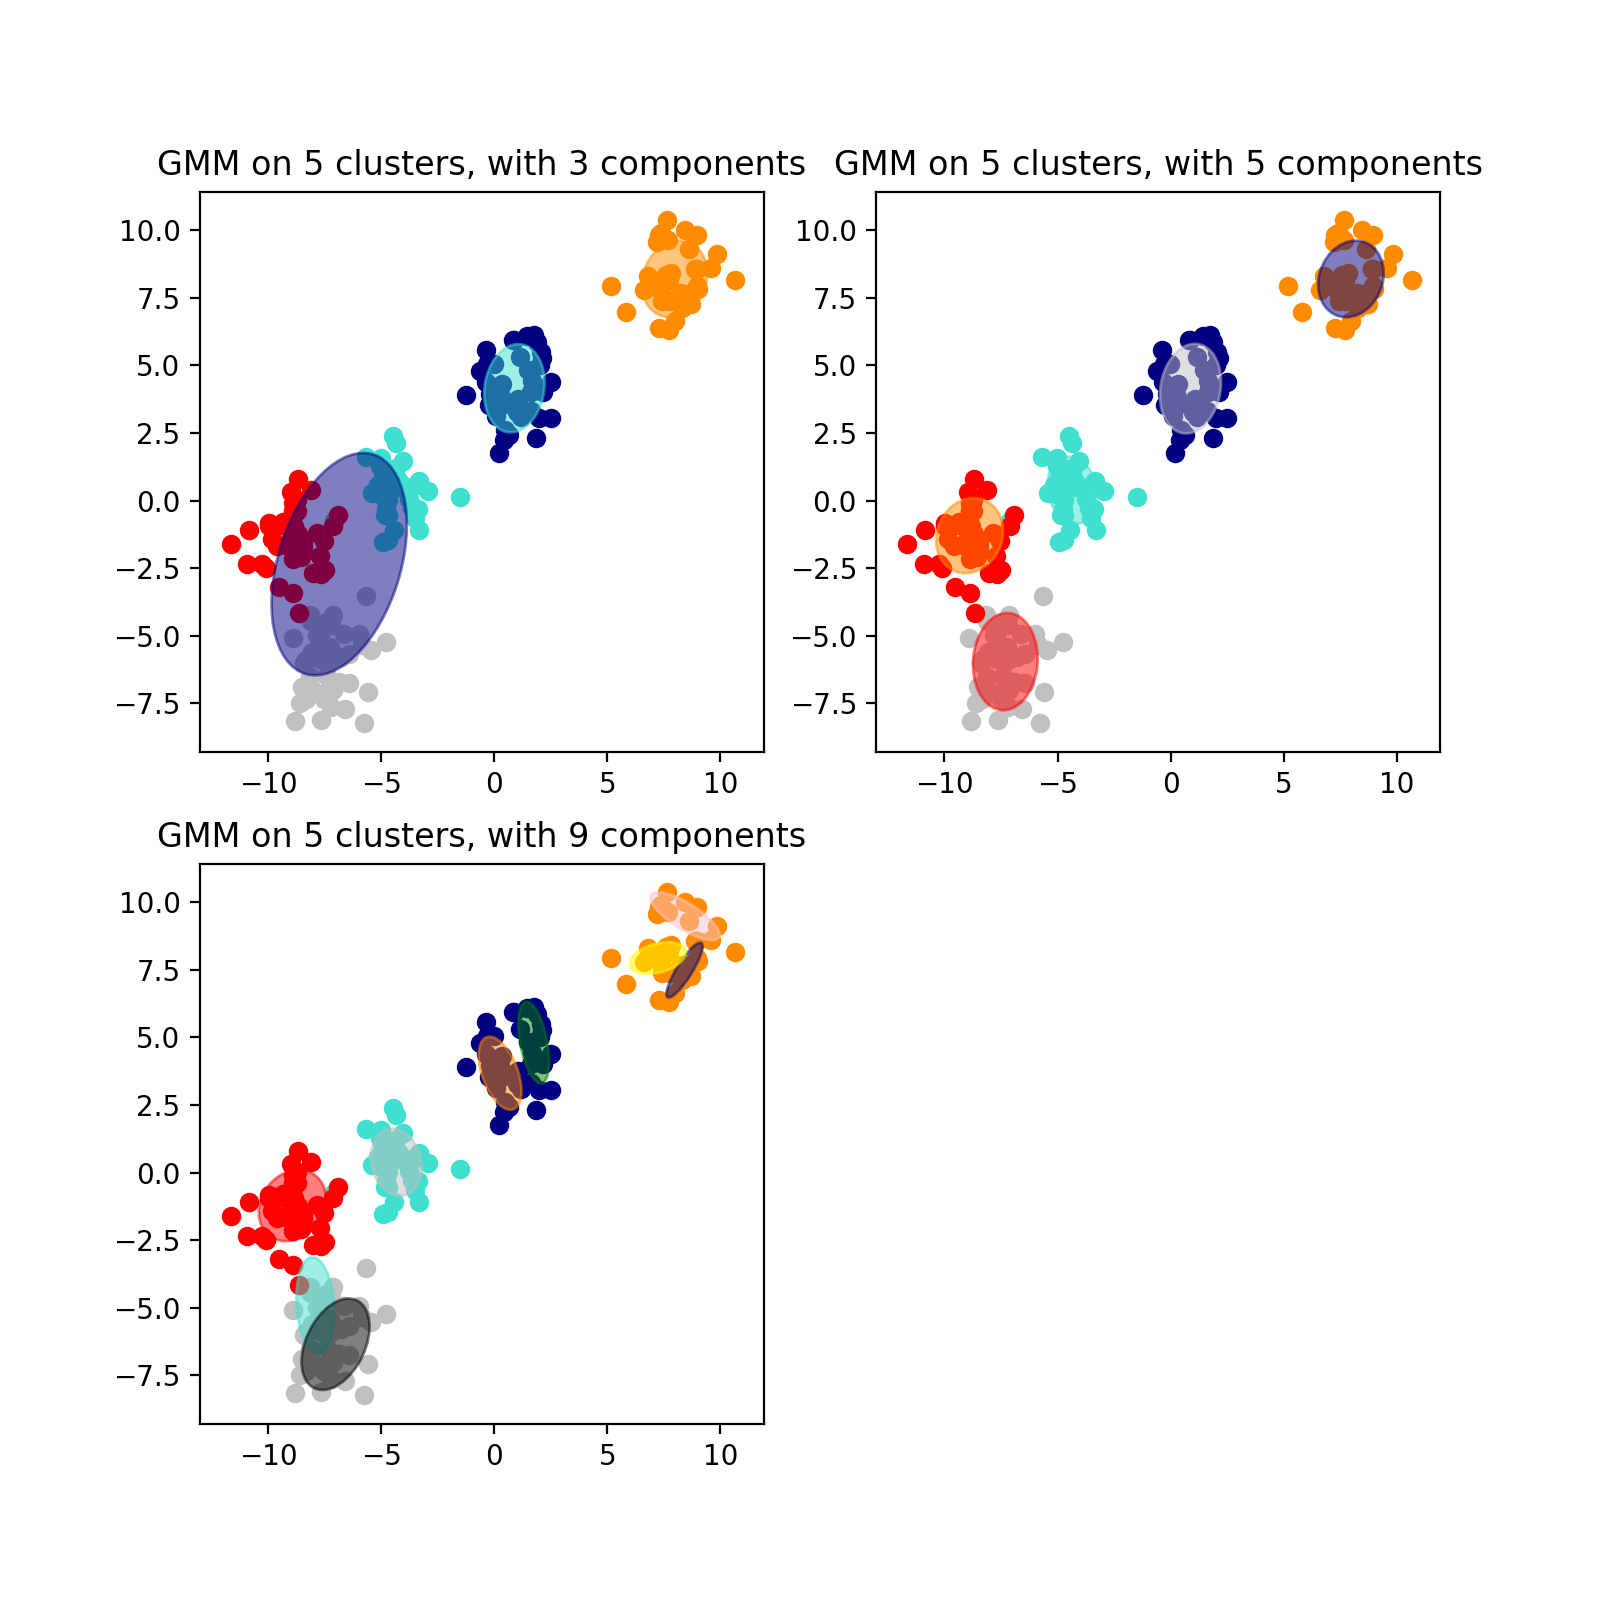

In [12]:
#Run GMM on round data.
syntheticdata = (X, y)[0]
synthetictarget = (X, y)[1]

#Create the gmms with different components. 
gmm3 = GaussianMixture(n_components = 3, covariance_type = 'full')
gmm5 = GaussianMixture(n_components = 5, covariance_type = 'full')
gmm9 = GaussianMixture(n_components = 9, covariance_type = 'full')

#Run it on the synthetic data.
gmm3.fit(syntheticdata)

plt.figure(figsize=(8,8))
#ax = fig.add_subplot(1,1,1)
ax=plt.subplot(221)
colors = ['navy', 'turquoise', 'darkorange']
datacolors = ['navy', 'turquoise', 'darkorange','silver','red']
for n, color in enumerate(datacolors):
        data = syntheticdata[synthetictarget == n]
        plt.scatter(data[:,0], data[:,1], color=color)

# now we'll plot some ellipses based on the first two dimensions of the Gaussians        
for n, color in enumerate(colors):
    covariances3 = gmm3.covariances_[n][:5, :3]
    v, w = np.linalg.eigh(covariances3)
    u = w[0] / np.linalg.norm(w[0])
    angle = np.arctan2(u[1], u[0])
    angle = 180 * angle / np.pi  # convert to degrees
    v = 2. * np.sqrt(2.) * np.sqrt(v)
    ell = mpl.patches.Ellipse(gmm3.means_[n, :2], v[0], v[1],
                              180 + angle, color=color)
    ell.set_clip_box(ax.bbox)
    ell.set_alpha(0.5)
    ax.add_artist(ell)
    
plt.title("GMM on 5 clusters, with 3 components")

#Run it with 5 components.
gmm5.fit(syntheticdata)

ax=plt.subplot(222)
colors = ['navy', 'turquoise', 'darkorange','silver','red']
          
for n, color in enumerate(colors):
        data = syntheticdata[synthetictarget == n]
        plt.scatter(data[:,0], data[:,1], color=color)

# now we'll plot some ellipses based on the first two dimensions of the Gaussians        
for n, color in enumerate(colors):
    covariances5 = gmm5.covariances_[n][:2, :2]
    v, w = np.linalg.eigh(covariances5)
    u = w[0] / np.linalg.norm(w[0])
    angle = np.arctan2(u[1], u[0])
    angle = 180 * angle / np.pi  # convert to degrees
    v = 2. * np.sqrt(2.) * np.sqrt(v)
    ell = mpl.patches.Ellipse(gmm5.means_[n, :2], v[0], v[1],
                              180 + angle, color=color)
    ell.set_clip_box(ax.bbox)
    ell.set_alpha(0.5)
    ax.add_artist(ell)
    
plt.title("GMM on 5 clusters, with 5 components")

#GMM with 9.
gmm9.fit(syntheticdata)

ax=plt.subplot(223)
colors = ['navy', 'turquoise', 'darkorange','silver','red','green','black','pink','yellow']
for n, color in enumerate(colors):
        data = syntheticdata[synthetictarget == n]
        plt.scatter(data[:,0], data[:,1], color=color)

# now we'll plot some ellipses based on the first two dimensions of the Gaussians        
for n, color in enumerate(colors):
    covariances9 = gmm9.covariances_[n][:2, :2]
    v, w = np.linalg.eigh(covariances9)
    u = w[0] / np.linalg.norm(w[0])
    angle = np.arctan2(u[1], u[0])
    angle = 180 * angle / np.pi  # convert to degrees
    v = 2. * np.sqrt(2.) * np.sqrt(v)
    ell = mpl.patches.Ellipse(gmm9.means_[n, :2], v[0], v[1],
                              180 + angle, color=color)
    ell.set_clip_box(ax.bbox)
    ell.set_alpha(0.5)
    ax.add_artist(ell)
    
plt.title("GMM on 5 clusters, with 9 components")

<IPython.core.display.Javascript object>


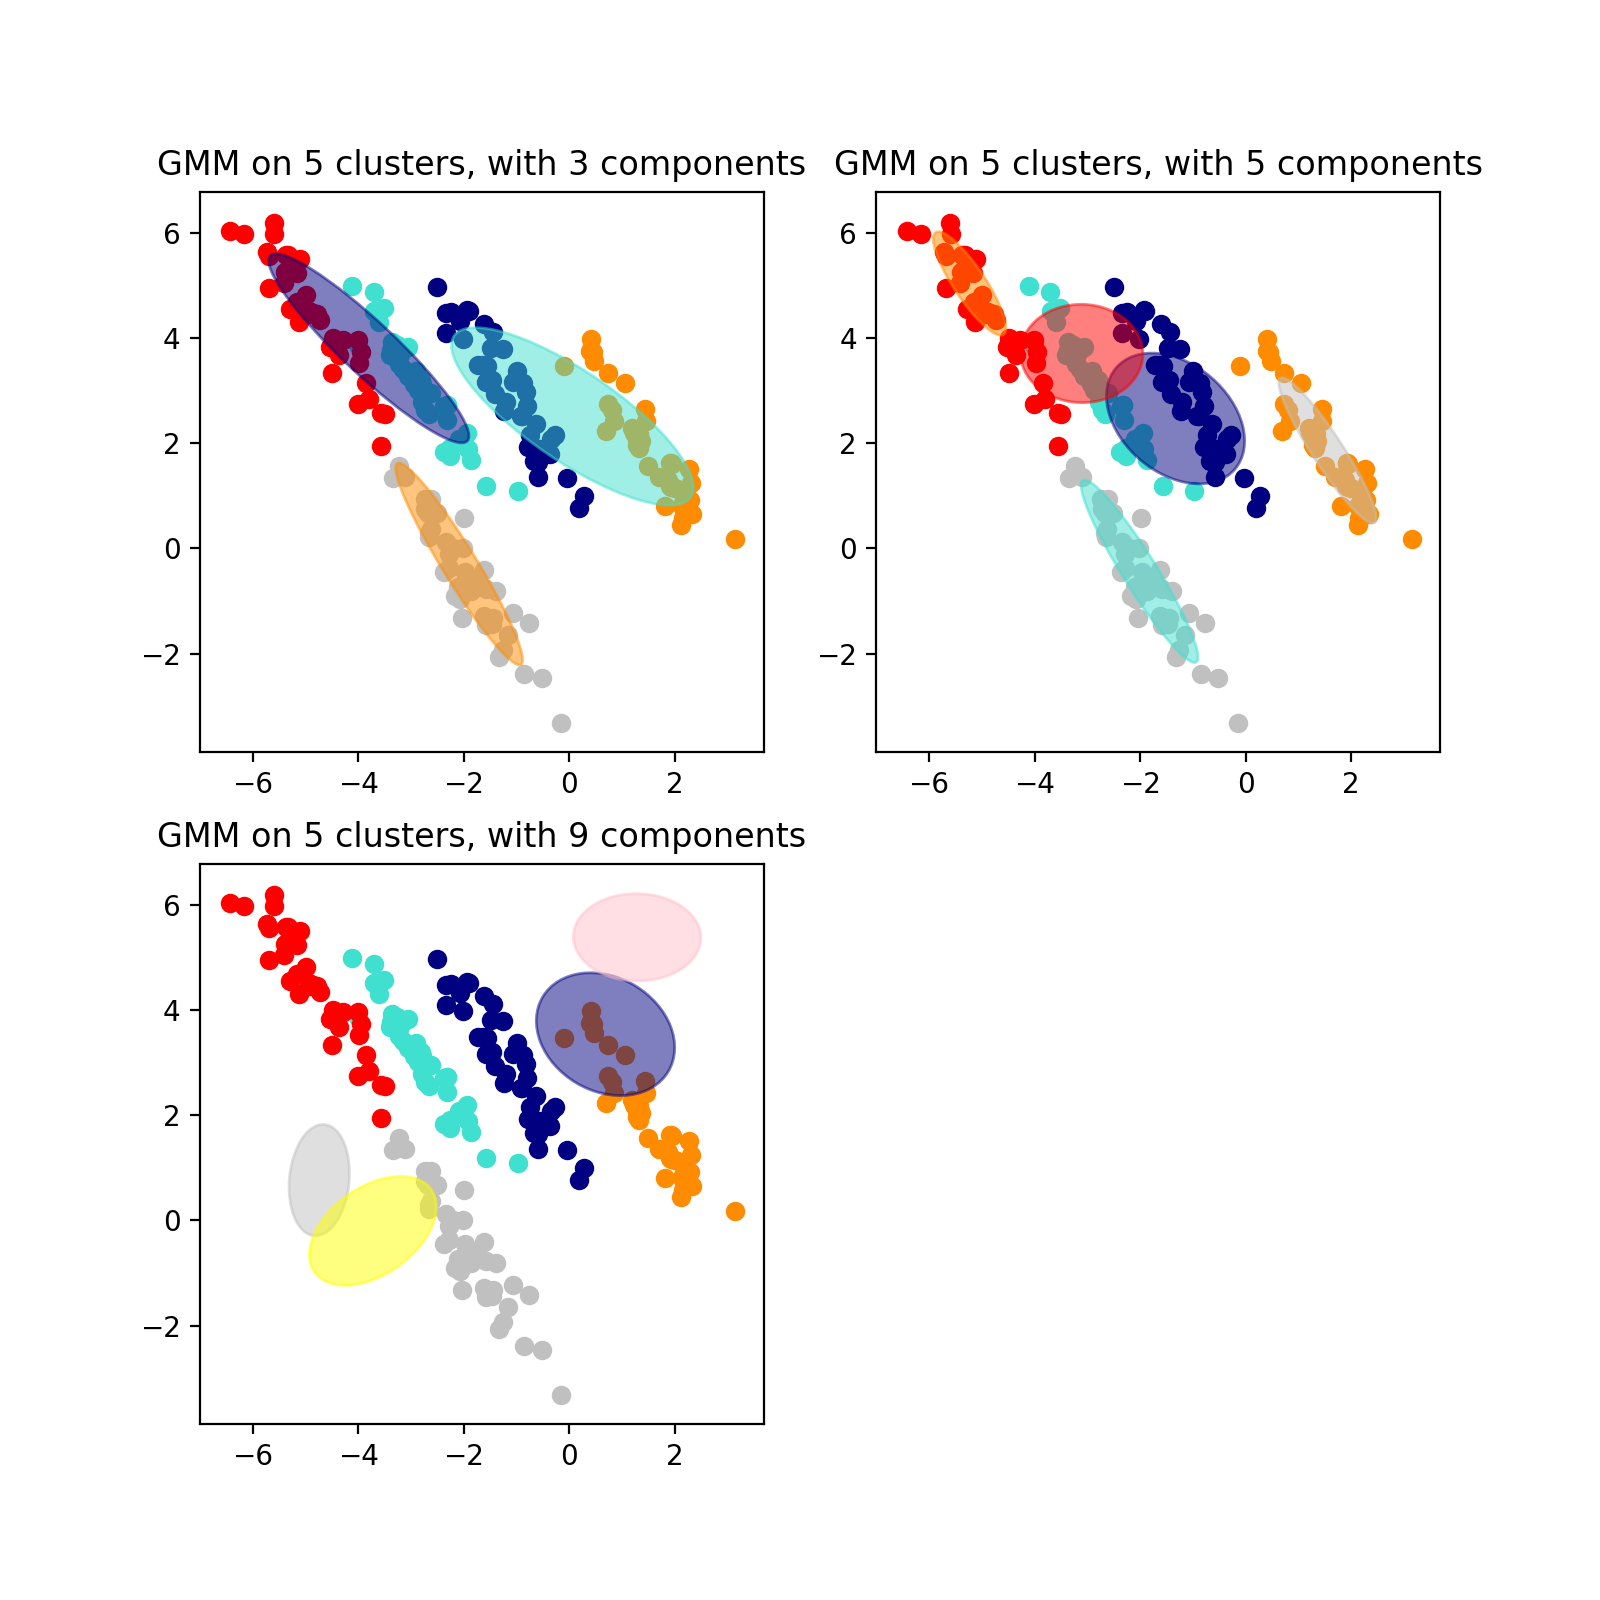

In [13]:
#todo: plot the "stretched" clusters

transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
Z = np.dot(X, transformation)

#Run 3GMM on stretched Z.
gmm3.fit(Z)

plt.figure(figsize=(8,8))
ax=plt.subplot(221)
datacolors = ['navy', 'turquoise', 'darkorange','silver','red']
colors = ['navy', 'turquoise', 'darkorange']
for n, color in enumerate(datacolors):
        data = Z[synthetictarget == n]
        plt.scatter(data[:,0], data[:,1], color=color)

# now we'll plot some ellipses based on the first two dimensions of the Gaussians        
for n, color in enumerate(colors):
    covariances3z = gmm3.covariances_[n][:2, :2]
    v, w = np.linalg.eigh(covariances3z)
    u = w[0] / np.linalg.norm(w[0])
    angle = np.arctan2(u[1], u[0])
    angle = 180 * angle / np.pi  # convert to degrees
    v = 2. * np.sqrt(2.) * np.sqrt(v)
    ell = mpl.patches.Ellipse(gmm3.means_[n, :2], v[0], v[1],
                              180 + angle, color=color)
    ell.set_clip_box(ax.bbox)
    ell.set_alpha(0.5)
    ax.add_artist(ell)
    
plt.title("GMM on 5 clusters, with 3 components")

#Run 5GMM on stretched Z.
gmm5.fit(Z)

ax=plt.subplot(222)
colors = ['navy', 'turquoise', 'darkorange','silver','red']
for n, color in enumerate(datacolors):
        data = Z[synthetictarget == n]
        plt.scatter(data[:,0], data[:,1], color=color)

# now we'll plot some ellipses based on the first two dimensions of the Gaussians        
for n, color in enumerate(colors):
    covariances5z = gmm5.covariances_[n][:2, :2]
    v, w = np.linalg.eigh(covariances5z)
    u = w[0] / np.linalg.norm(w[0])
    angle = np.arctan2(u[1], u[0])
    angle = 180 * angle / np.pi  # convert to degrees
    v = 2. * np.sqrt(2.) * np.sqrt(v)
    ell = mpl.patches.Ellipse(gmm5.means_[n, :2], v[0], v[1],
                              180 + angle, color=color)
    ell.set_clip_box(ax.bbox)
    ell.set_alpha(0.5)
    ax.add_artist(ell)
    
plt.title("GMM on 5 clusters, with 5 components")

#Run 9GMM on stretched Z. 
gmm9.fit(syntheticdata)

ax=plt.subplot(223)
colors = ['navy', 'turquoise', 'darkorange','silver','red','green','black','pink','yellow']
for n, color in enumerate(datacolors):
        data = Z[synthetictarget == n]
        plt.scatter(data[:,0], data[:,1], color=color)

# now we'll plot some ellipses based on the first two dimensions of the Gaussians        
for n, color in enumerate(colors):
    covariances9z = gmm9.covariances_[n][:2, :2]
    v, w = np.linalg.eigh(covariances9z)
    u = w[0] / np.linalg.norm(w[0])
    angle = np.arctan2(u[1], u[0])
    angle = 180 * angle / np.pi  # convert to degrees
    v = 2. * np.sqrt(2.) * np.sqrt(v)
    ell = mpl.patches.Ellipse(gmm9.means_[n, :2], v[0], v[1],
                              180 + angle, color=color)
    ell.set_clip_box(ax.bbox)
    ell.set_alpha(0.5)
    ax.add_artist(ell)
    
plt.title("GMM on 5 clusters, with 9 components")

# What do you notice?
Explain what you can conclude from examining these plots; describe both your conclusions about K-means and GMM, for the different types of data (round vs stretched), and for the different cluster sizes (e.g. how easy is it to tell what the "right" number of clusters is if you didn't krow ahead of time?)

Note: you may want to re-run these clusterings several times to examine any patterns that may occur in random-restarts

***

***K-Means:*** 

K-Means is very effective on data that has clear seperation between spherical clusters. However, on elongated data it fails. It also only is "effective" if you know the amount of clusters ahead of time - this is clearly evident in the synthetic data with 5 clusters. When you go too high, it starts to split the clusters into subclusters, and too little, groups them together.

***GMM***:

Note: My code didn't seem to work for the elongated one with 9 clusters.

GMM seems to shine in round clustered models when there is tightly packed centers. This makes sense as it uses the mean and the variance to generate distributions. However, if you designate too many components it quickly starts to do what K-Means does and splits clusters into subclusters.

GMM seems to perform fairly well on elongated data if you know the amount of clusters beforehand, such as at 5 it is able to distinguish each cluster from one another. For components that are too high, it seems to fail outright as evident in the 9 component chart (given that my coding was correct.)



# Implement K-means yourself
Write your own implementation of the K-means algorithm below, and test it to demonstrate that it works correctly.  Note that since it is a randomized algorithm, you may not get exactly the same result as the sci-kit learn version, but if you run each several times (with different random seeds), you should see generally the same kind of results out of yours and theirs.

You can test your algorithm on the iris data and the synthetic data, and you can always generate extra synthetic datasets to test it on if you want.

In [14]:
def distance(x,y):
    return np.sqrt(np.sum((x-y)**2))

def mykmeans(k,data):

    #Parameters: data is the dataset, k is the number of clusters.
    # Number of training data
    n = data.shape[0]
    # Number of features in the data
    c = data.shape[1]

    # Randomly select different points to be a centroid.
    # Note: I had initially tried to use numpy.random.randomint but there would be times where no points were assigned
    # to certain clusters. This would then break the algorithm further down in np.mean. Using an online resource I saw
    # an alternate way of doing it by assigning the centroid to be a random point for a more stable result.
    centroids = data.copy()
    np.random.shuffle(centroids)
    centers = centroids[:k]
    
    #Create an "old centers" assigmemnts matrix.
    centers_old = np.zeros(centers.shape)

    #Create an array for cluster assignmnets.
    clusters = np.zeros(n)

    #Initial assignments with random clusters.
    #Note: I had attempted to try convergence by comparing to see if the cluster assignments change between runs.
    #However, my algorithm kept failing to converge and ran infinitely, so I decided to use error for convergence 
    #instead.
    
    #Calculate the error between the old centers and new centers. If error is 0 , then break the while loop i.e.
    #centers have not moved and converged. 
    error = distance(centers,centers_old)
    while error != 0:
        for i in range(n):
            best = float("inf")
            for j in range(k):
                dist=distance(data[i],centers[j])
                if dist < best:
                    best = dist
                    clusters[i] = j
            
        #Move cluster assingments to average of points assigned to it.
        for i in range(k):
            for j in range(c):
                centers[i][j] = sum(data[clusters == i][:,j])/len(data[clusters == i][:,j])
        
        #Calculate the error. If error is 0 , then break the while loop.
        error = distance(centers,centers_old)
        centers_old = centers.copy()
        
    return clusters.astype(int)

<IPython.core.display.Javascript object>


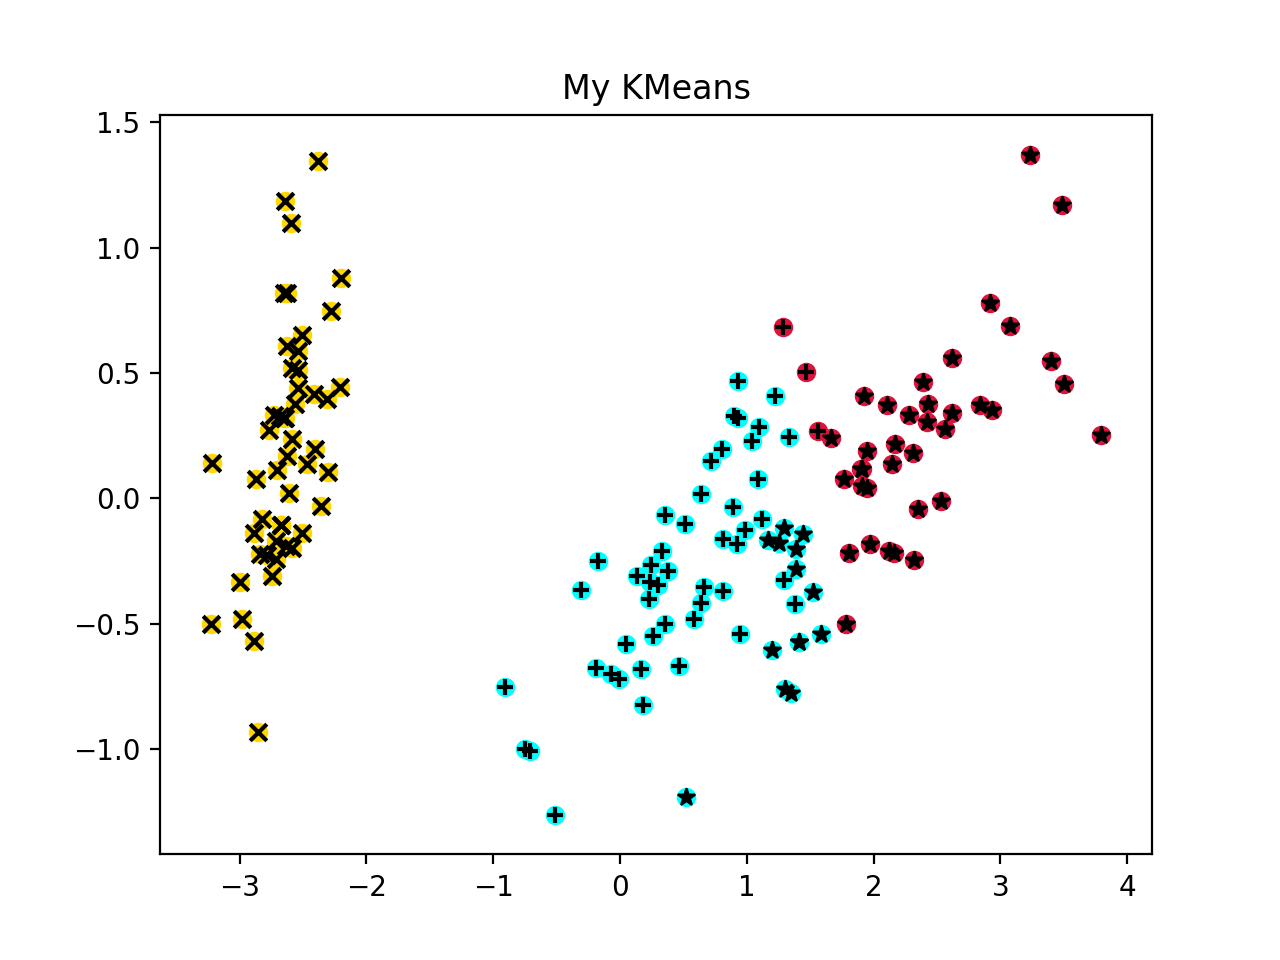

In [15]:
#Test the clustering on the iris set.

clusters = mykmeans(3,iris.data)

plt.figure()

colors = ['cyan', 'crimson', 'gold']
for i in range(len(iris2d)):
    plt.scatter(iris2d[i][0], iris2d[i][1], color=colors[clusters[i]])

markers = ['x', '+', '*']
#markers = [9, 10, 11]
for i in range(len(iris2d)):
    plt.scatter(iris2d[i][0], iris2d[i][1], marker=markers[iris.target[i]], color='black')

plt.title('My KMeans')

<IPython.core.display.Javascript object>


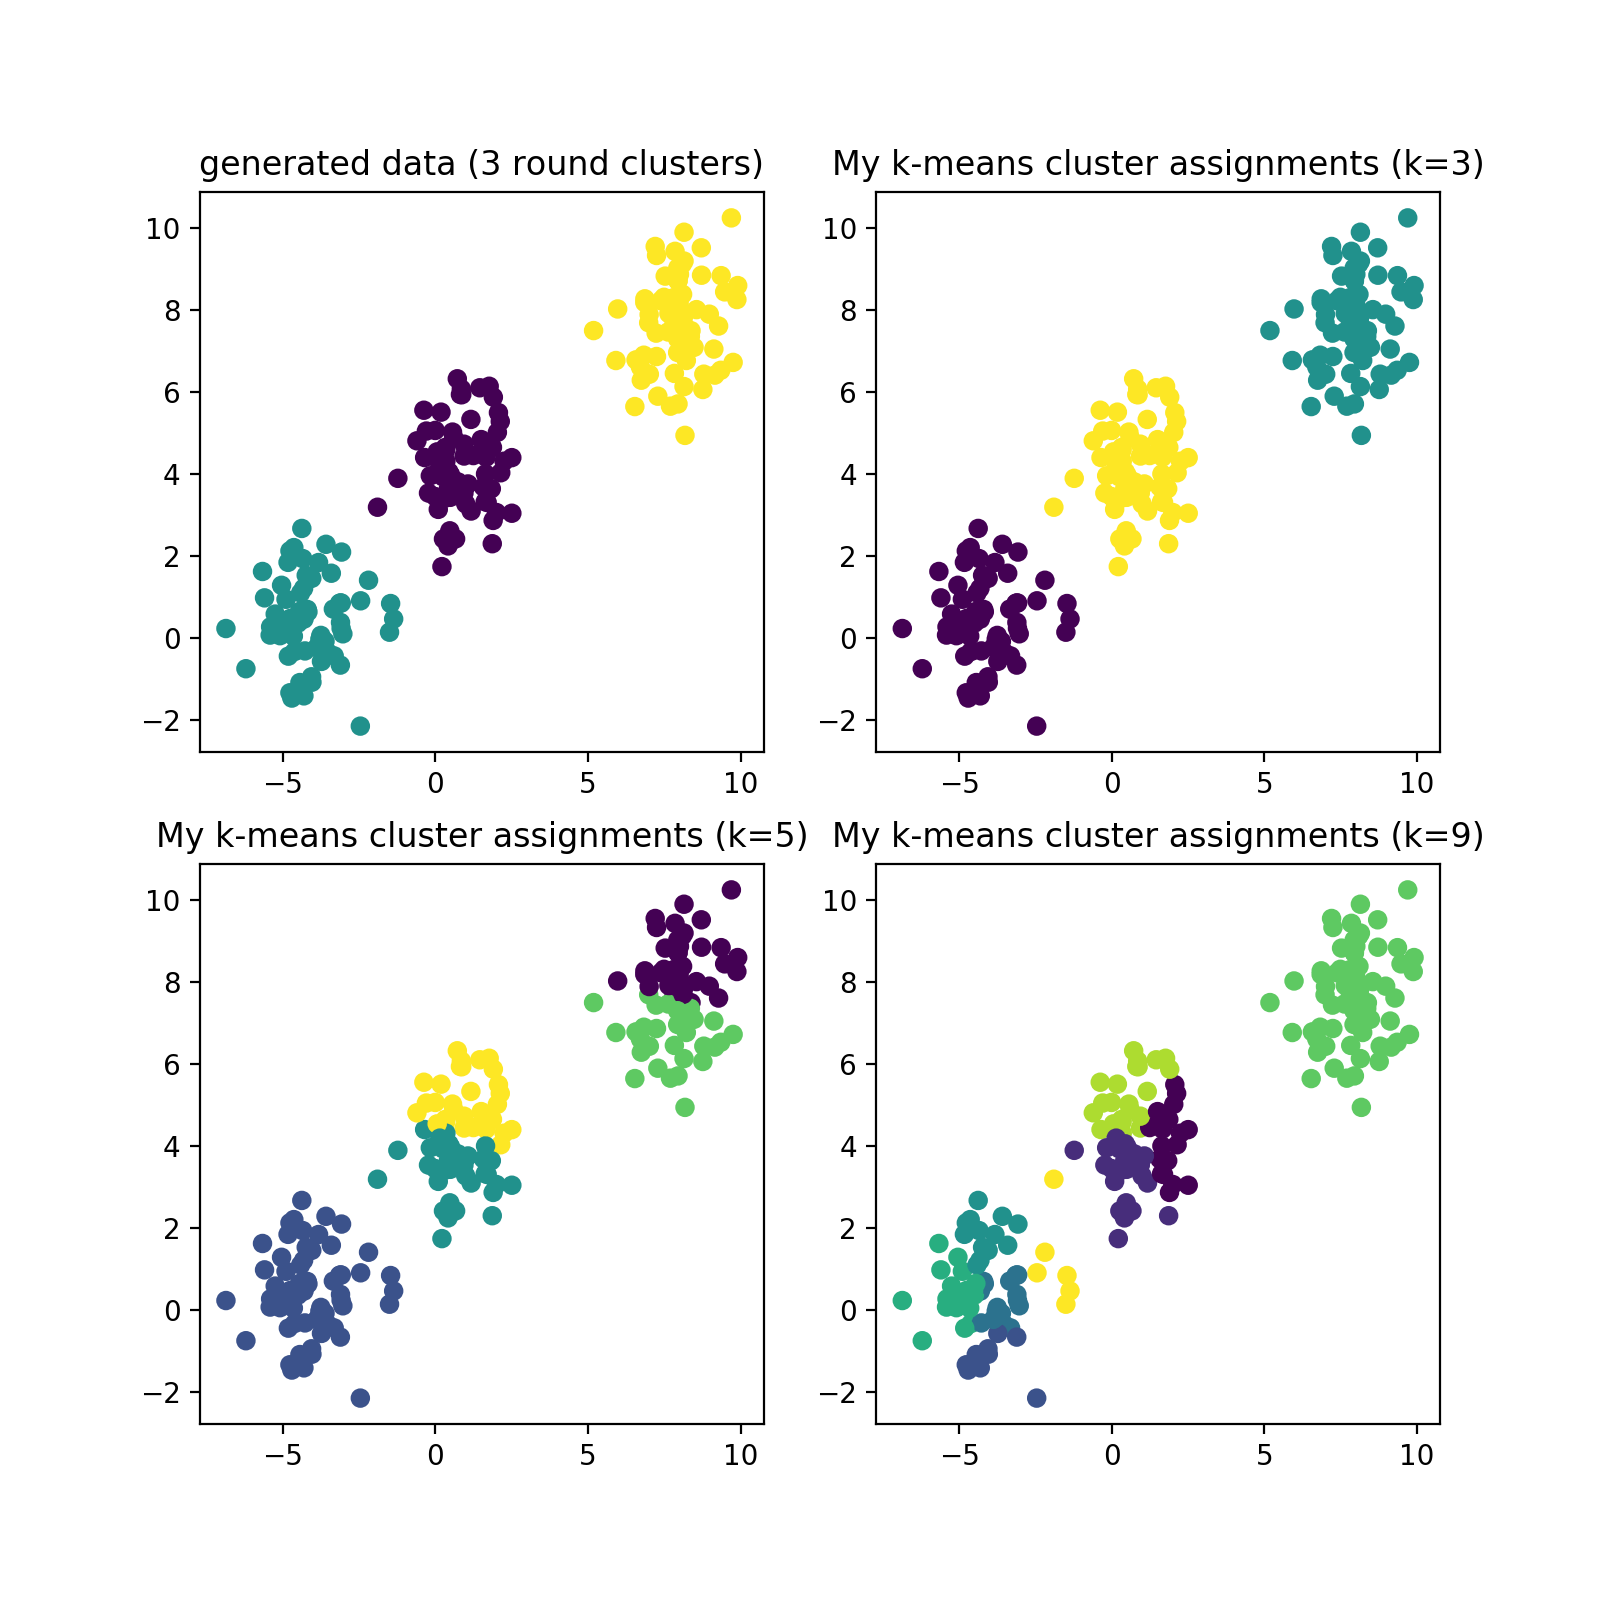

In [16]:
#Test the clustering on the synthetic data, but with 3 centers.

(X, y) = datasets.make_blobs(centers=3,  n_samples=200, n_features=2, random_state=3)

plt.figure(figsize=(8,8))

plt.subplot(221)
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("generated data (3 round clusters)")

# run k-means with k=3
y_pred = mykmeans(3,(X,y)[0])

# add another subplot; still a 2x2 grid, but this is the 2nd plot
plt.subplot(222)
plt.scatter(X[:,0], X[:,1], c=y_pred)
plt.title("My k-means cluster assignments (k=3)")

# re-run K-means with k=5 and then plot as the 3rd subfigure
y_pred = mykmeans(5,(X,y)[0])
plt.subplot(223)
plt.scatter(X[:,0], X[:,1], c=y_pred)
plt.title("My k-means cluster assignments (k=5)")

# re-run K-means with k=9 and then plot as the 4rd subfigure
y_pred = mykmeans(9,(X,y)[0])
plt.subplot(224)
plt.scatter(X[:,0], X[:,1], c=y_pred)
plt.title("My k-means cluster assignments (k=9)")